In [2]:
import pandas as pd

C:\Users\kmuga\AppData\Local\Temp\ipykernel_22456\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("weather_by_cities.csv")

In [4]:
df.head()

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny


<Axes: xlabel='city'>

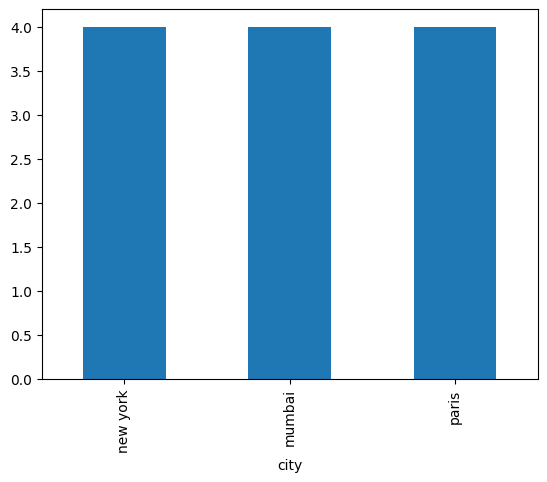

In [7]:
df["city"].value_counts().plot.bar()

In [23]:
g = df.groupby("city")

In [9]:
g

In [10]:
for city,data in g:
  print(city)
  print("\n")
  print(data)

mumbai


        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york


        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris


         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [14]:
g.get_group("mumbai")

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


In [12]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [16]:
g.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [18]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


In [24]:
g[["temperature","windspeed"]].mean()

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [25]:
g[["temperature","windspeed"]].median()

,temperature,windspeed
city,,
mumbai,88.5,8.5
new york,32.5,7.0
paris,47.5,11.5


In [21]:
g = df.groupby("city")[["temperature","windspeed"]].mean()

In [22]:
g

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


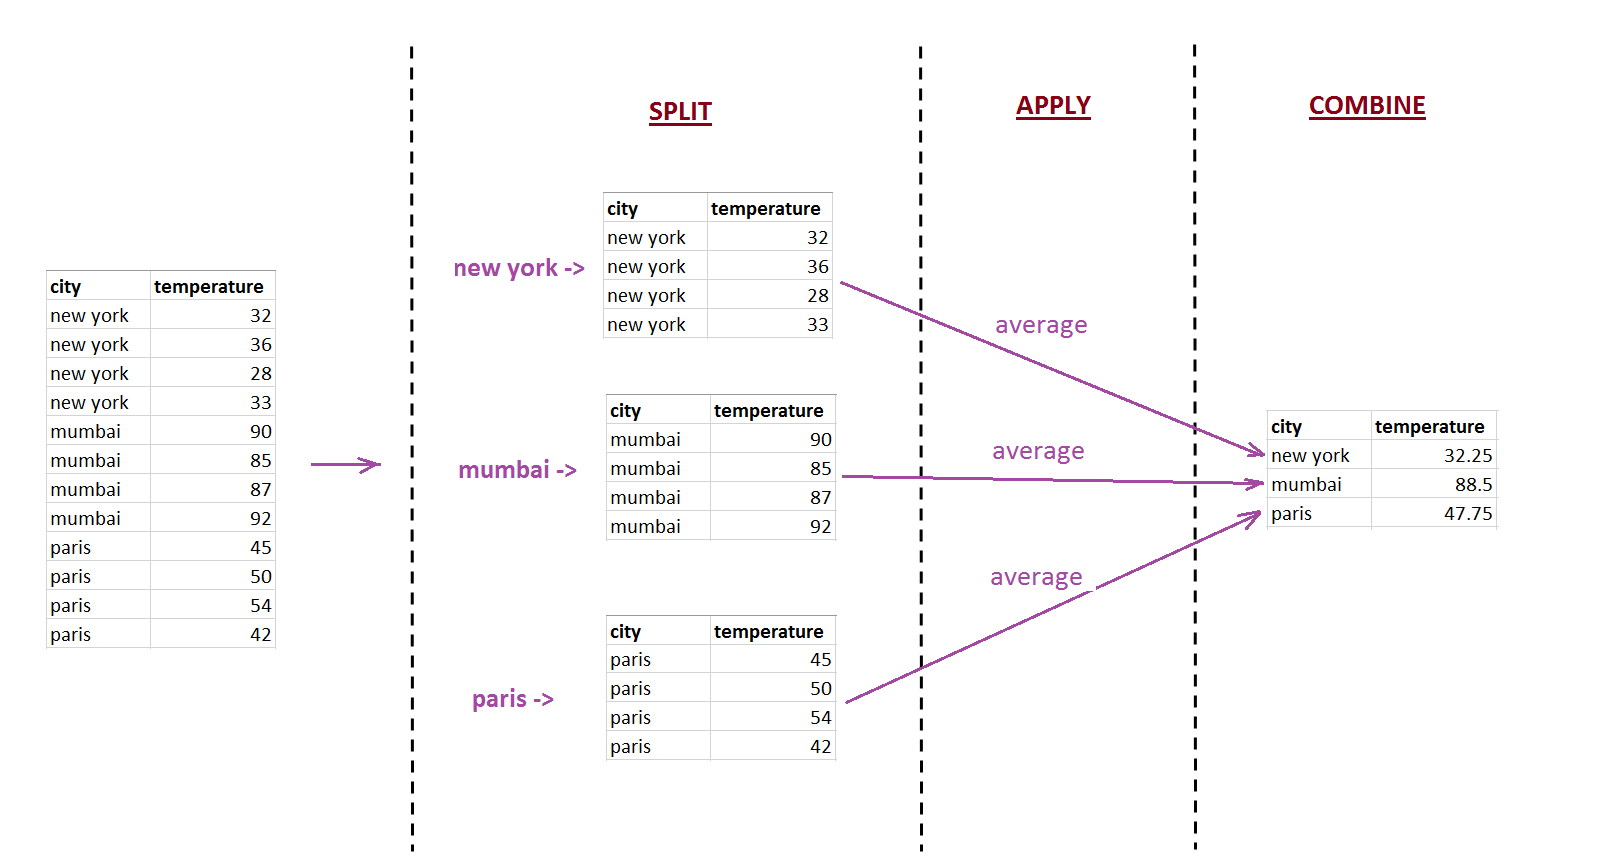


In [26]:
g.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


In [27]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [28]:
g.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [29]:
g.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


<Axes: >

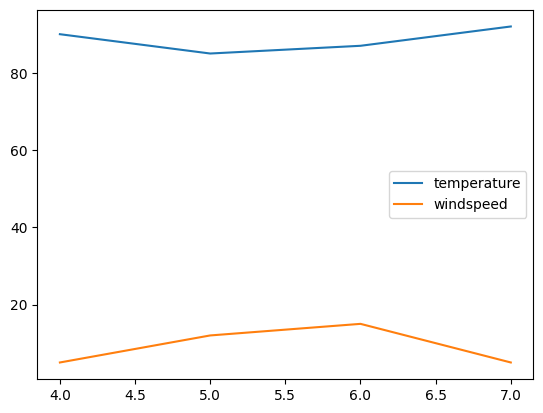

In [32]:
g.get_group("mumbai").plot()

In [33]:
#Custom Group 

# Days When temp was between 80 and 90
# Days when temp bet 50 and 60
# Daya when it was anything else

In [40]:
def grouper(df,index,col):
  if 80 <= df[col].loc[index] <=90:
    return "80-90"
  elif 50 <= df[col].loc[index] <=60:
    return "50-60"
  else:
    return 'others'


In [41]:
g = df.groupby(lambda x :grouper(df,x,'temperature') )

In [46]:
for key,d in g:
  print(key)
  print("\n")
  print(d)

50-60


         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
80-90


        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
others


         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
11  1/4/2017     paris           42         10  Cloudy


In [49]:
def helper_function(value):
  if 80 <= value<=90:
    return "80-90"
  elif 50 <= value <=60:
    return "50-60"
  else:
    return 'others'


In [50]:
df["new_group"] =df["temperature"].apply(lambda x :helper_function(x) )

In [52]:
new_g = df.groupby("new_group")

In [53]:
for key,d in new_g:
  print(key)
  print("\n")
  print(d)

50-60


         day   city  temperature  windspeed   event new_group
9   1/2/2017  paris           50         13  Cloudy     50-60
10  1/3/2017  paris           54          8  Cloudy     50-60
80-90


        day    city  temperature  windspeed  event new_group
4  1/1/2017  mumbai           90          5  Sunny     80-90
5  1/2/2017  mumbai           85         12    Fog     80-90
6  1/3/2017  mumbai           87         15    Fog     80-90
others


         day      city  temperature  windspeed   event new_group
0   1/1/2017  new york           32          6    Rain    others
1   1/2/2017  new york           36          7   Sunny    others
2   1/3/2017  new york           28         12    Snow    others
3   1/4/2017  new york           33          7   Sunny    others
7   1/4/2017    mumbai           92          5    Rain    others
8   1/1/2017     paris           45         20   Sunny    others
11  1/4/2017     paris           42         10  Cloudy    others
